# Método CRISP-DM aplicado a la predicción de precios de hogares en el área metropolitana

## Entendimiento del Negocio


https://eafit-my.sharepoint.com/:w:/g/personal/lagonzala1_eafit_edu_co/ETHPB5HNXmZKqmOdtcFGZR4BHfAYmSyKaGVeLXXzUd0zPQ?e=2G8KqK


## Entendimiento de los datos

### Carga de datos:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

ugly_data = pd.read_json("readydata.json") # Use ugly_data si quiere ver cómo eran los datos al inicio.


In [2]:
df = ugly_data.copy()
df.head()

,ID de la propiedad,Tipo de Operacion,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Venta,Apartamento,Antioquia,Bello,Niquia,neighbourhood,59.0,NaN,3,...,False,False,False,True,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
1,192805940,Venta,Apartamento,Antioquia,Bello,Andalucia,neighbourhood,64.9,64.9,3,...,False,False,False,True,2025-08-29,2025-08-29,"Apartamento en Venta en Andalucia, Bello",/apartamento-en-venta-en-andalucia-bello/19280...,280000000,280000000
2,192833958,Venta,Apartamento,Antioquia,Bello,Bello,city,67.0,NaN,3,...,False,False,False,True,2025-09-04,2025-10-30,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192833958,260241000,260000000
3,192839470,Venta,Apartamento,Antioquia,Bello,Bello,city,72.0,72.0,3,...,False,False,False,True,2025-09-05,2025-09-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192839470,433369521,433000000
4,192852231,Venta,Casa,Antioquia,Bello,Prado,neighbourhood,91.0,91.0,3,...,False,False,False,True,2025-09-09,2025-09-29,"Casa en Venta en Prado, Bello",/casa-en-venta-en-prado-bello/192852231,295000000,295000000


# Breve preparación para posterior análisis


### Orígen de los datos
Antes de proceder, es importante comprender de dónde provienen estos datos.

Estos fueron extraídos de un portal web utilizando ténicas de web scraping, estos datos son disponibles públicamente. 

El web scraping no es infalible, se asume la existencia se ciertos elementos en las páginas que se visitan y, si el nombre de variables cambia, o si estas no aparecen, errores inesperados pueden suceder.

Es por esto que se hace necesario este primer análsis, garantizando la integridad del proceso.

In [3]:
df.shape

(5827, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5827 entries, 0 to 5826
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID de la propiedad                  5827 non-null   int64  
 1   Tipo de Operacion                   5827 non-null   object 
 2   Tipo de Inmueble                    5827 non-null   object 
 3   Departamento                        5827 non-null   object 
 4   Ciudad                              5827 non-null   object 
 5   Localidad Principal                 5823 non-null   object 
 6   Tipo de Localidad Principal         5823 non-null   object 
 7   Metros Cuadrados                    5785 non-null   float64
 8   Metros Cuadrados Construidos        4828 non-null   float64
 9   Estrato                             5827 non-null   int64  
 10  Latitud                             5827 non-null   float64
 11  Longitud                            5827 non-nul

Por lo que podemos ver, hay algunos registros vacíos, por lo tanto no está completo del todo. Se seguirá este análisis más adelante

## Primer Vistazo: Head y Describe

In [5]:
df.head(10)

,ID de la propiedad,Tipo de Operacion,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
0,192788587,Venta,Apartamento,Antioquia,Bello,Niquia,neighbourhood,59.00,NaN,3,...,False,False,False,True,2025-08-25,2025-09-16,"Apartamento en Venta en Niquia, Bello",/apartamento-en-venta-en-niquia-bello/192788587,275000000,275000000
1,192805940,Venta,Apartamento,Antioquia,Bello,Andalucia,neighbourhood,64.90,64.90,3,...,False,False,False,True,2025-08-29,2025-08-29,"Apartamento en Venta en Andalucia, Bello",/apartamento-en-venta-en-andalucia-bello/19280...,280000000,280000000
2,192833958,Venta,Apartamento,Antioquia,Bello,Bello,city,67.00,NaN,3,...,False,False,False,True,2025-09-04,2025-10-30,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192833958,260241000,260000000
3,192839470,Venta,Apartamento,Antioquia,Bello,Bello,city,72.00,72.00,3,...,False,False,False,True,2025-09-05,2025-09-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192839470,433369521,433000000
4,192852231,Venta,Casa,Antioquia,Bello,Prado,neighbourhood,91.00,91.00,3,...,False,False,False,True,2025-09-09,2025-09-29,"Casa en Venta en Prado, Bello",/casa-en-venta-en-prado-bello/192852231,295000000,295000000
5,192868806,Venta,Apartamento,Antioquia,Bello,Zona industrial 1,neighbourhood,47.31,47.31,4,...,False,False,False,True,2025-09-13,2025-09-13,"Apartamento en Venta en Zona industrial 1, Bello",/apartamento-en-venta-en-zona-industrial-1-bel...,320000000,320000000
6,192838762,Venta,Apartamento,Antioquia,Bello,Cabañas,neighbourhood,69.00,NaN,4,...,False,False,False,True,2025-09-05,2025-11-04,"Apartamento en Venta en Cabañas, Bello",/apartamento-en-venta-en-cabañas-bello/192838762,425000000,425000000
7,192869195,Venta,Apartamento,Antioquia,Medellín,Medellín,city,55.00,NaN,3,...,False,False,False,True,2025-09-13,2025-10-30,Apartamento en Venta en Medellín,/apartamento-en-venta-en-medellin/192869195,251158228,251000000
8,192904526,Venta,Apartamento,Antioquia,Bello,Bello,city,NaN,NaN,3,...,False,False,False,True,2025-09-23,2025-10-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192904526,240000000,240000000
9,192904159,Venta,Apartamento,Antioquia,Bello,Bello,city,76.00,76.00,3,...,False,False,False,True,2025-09-23,2025-10-20,Apartamento en Venta en Bello,/apartamento-en-venta-en-bello/192904159,320000000,320000000


Son muchas columnas como se puede observar, vemos que hay clasificación de tipo de casa, ciudad, ubicación, estrato, y demás.

Vemos en esta primera muestra casas relativamente pequeñas menores a 50 metros cuadrados, y otras casi de 100 metros cuadrados. Parece que Bello sale mucho lo cuál sería bueno luego observar la distribución según ciudad...

Vemos algunas variables como Antigüedad que parecen ser clasificatorias, otras son fechas y también hay URL's para consultar las propiedades que dependen de la dirección y del ID de la propiedad.

Hay algunos datos nulos, se ven en las columnas de Metros Construidos y de Metros Cuadrados Construidos, así como muchos false en las variables booleanas.

In [6]:
df.describe()

,ID de la propiedad,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,Longitud,Antigüedad (Grupo),Cuartos (rooms),Dormitorios (bedrooms),Baños,Parqueaderos,Piso,Es Proyecto?,Precio con Administración Incluida,Precio
count,5.827000e+03,5785.000000,4828.000000,5827.000000,5827.000000,5827.000000,5703.000000,5827.000000,5827.000000,5827.000000,5827.000000,5612.000000,13.0,5.827000e+03,5.827000e+03
mean,1.894227e+08,149.676068,130.790387,4.167496,6.199873,-75.596745,2.285113,2.258109,2.889995,2.382015,1.143985,5.257662,1.0,1.007876e+09,1.005765e+09
std,2.453440e+07,1777.493584,324.867469,6.239423,0.100346,0.050384,1.314624,1.451103,0.871457,1.001855,1.183491,6.845410,0.0,1.175982e+10,1.175971e+10
min,5.093501e+06,0.000000,0.000000,0.000000,4.620578,-75.661438,0.000000,0.000000,0.000000,0.000000,-2.000000,-1.000000,1.0,3.900010e+05,1.000000e+00
25%,1.926759e+08,62.000000,62.000000,3.000000,6.153324,-75.625082,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.0,3.500000e+08,3.500000e+08
50%,1.928929e+08,76.000000,78.000000,4.000000,6.167528,-75.601615,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.0,4.922600e+08,4.920000e+08
75%,1.929936e+08,114.000000,118.000000,4.000000,6.225058,-75.569930,3.000000,3.000000,3.000000,2.000000,1.000000,10.000000,1.0,7.600000e+08,7.535000e+08
max,1.930546e+08,133377.000000,11000.000000,110.000000,11.212865,-74.030012,5.000000,15.000000,15.000000,10.000000,14.000000,97.000000,1.0,6.300003e+11,6.300000e+11


Miremos el describe. 

Hay casas de 0 metros cuadrados (mínimo) y un máximo de 133,377 metros cuadrados! El promedio suele ser 150 pero hay una desviación estándar enorme. 

Como los metros cuadrados construidos máximos son de 11,000 puede que el máximo en los metros cuadrados sea una finca y lo construido sea eso. También, por el count, se deduce que hay cientos de nulos.

Hay latitudes muy por fuera del Área metropolitana de Medellín (con un 4, el mínimo) y otra con un 11. 

Hay un estrato 110 así como un estrato 0.

Hay una oferta de propiedad con 10 baños y una con 14 parqueaderos. Peor aún, hay ofertas de propiedades sin baños (aparentemente) y sin dormitorios o cuartos... Sin embargo, hay otras con 15 cuartos.

Una oferta dice que tiene 97 pisos, o está en el 97° piso. Lo cuál es igualmente irracional teniendo en cuenta la zona estudiada. 

La variable Proyecto? está casi vacía, sólo 13 registros no nulos de +5000. 

Entre otras cosas que pueden ser interesantes.

_Más adelante veremos que estos valores raros muchas veces corresponden a valores nulos._

## Selección de columnas y leve preparación.

Que algunas columnas sean de tipo "object" es engañoso, object puede contener realmente cualquier cosa. Esto puede sugerir que en algunas columnas hay números donde no debe haber, o strings, o cualquier cosa.

Para ello se verificará lo siguiente:

1- Tipo de operacion: Todas las operaciones deben ser de tipo "Venta" si no hubo fallas en la extracción.

2- Tipo de Inmueble: Analizar los valores únicos de la columna y verificar sean como se espera.

3- Departamento: Todas las filas deberían tener como departamento "Antioquia". 

4- Ciudad: Se deben analizar los elementos únicos de la columna ciudad y contrastar con las ciudades del Área Metropolitana del Valle de Aburrá que se planea usar en el proyecto (Medellín, Envigado, Sabaneta, Itagüi, La Estrella y Bello).

5- Localidad Principal: Al momento de la extracción no es claro aún qué representaba esta etiqueta en el sistema del portal, por esto se hará un análisis de los valores únicos.

6- Tipo de Localidad Principal: Semejante a lo anterior.

7- Analizar la variable "Es Proyecto?" aparentemente booleana y verificar por qué se ha leído como float64.

8- Fechas: Nuevamente, object puede ser cucalquier cosa, se debe intentar la conversión a fecha y analizar si hay algun error por formato incorrecto.

9- Finalmente, analizar las variables booleanas y decidir si  son suficientemente relevantes.

10- Algunos extras

** **Verificar tipo de Operación** **

In [7]:
# Tipo de operacion.

df["Tipo de Operacion"].nunique()

# Sólo hay un tipo de operación, lo cual es congruente, todas las filas son ventas.

1

In [8]:
# Eliminamos la columna pues ya no es relevante para mayor análisis.

df.drop(columns=["Tipo de Operacion"], inplace=True)

** **Verificar tipo de Inmuebles** **

In [9]:
# Verificar los tipos de inmuebles.

df["Tipo de Inmueble"].unique()

# Similarmente, hay dos opciones en el dataset: Apartamento y Casa. Esto es congruente.

array(['Apartamento', 'Casa'], dtype=object)

In [10]:
# Finalmente convertimos la columna a string

df["Tipo de Inmueble"] = df["Tipo de Inmueble"].astype(str)


** **Verificar Departamento** **

In [11]:
df["Departamento"].nunique()

# Aquí vemos algo extraño... Hay 4 departamentos, cuando debería haber uno. Veamos cuáles son...

4

In [12]:
df["Departamento"].unique()

# Hay datos del Magdalena, de Bogotá y de Cundinamarca. Veamos cuántos son.

array(['Antioquia', 'Magdalena', 'Bogotá, d.c.', 'Cundinamarca'],
      dtype=object)

In [13]:
df[df["Departamento"] != "Antioquia"]

# Interesante... Afortunadamente sólo son 4 de las filas, estos apartamentos existen 

,ID de la propiedad,Tipo de Inmueble,Departamento,Ciudad,Localidad Principal,Tipo de Localidad Principal,Metros Cuadrados,Metros Cuadrados Construidos,Estrato,Latitud,...,Es Oficina?,Es Penthouse?,Acepta Permuta?,(paid quota)?,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio con Administración Incluida,Precio
559,192532640,Casa,Magdalena,Bello,Bello,city,116.0,116.0,3,11.212865,...,False,False,False,True,2025-06-15,2025-10-22,Casa en Venta en Bello,/casa-en-venta-en-bello/192532640,255147000,255000000
1197,192712949,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,57.0,57.0,4,4.620578,...,False,False,False,True,2025-08-02,2025-08-04,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192712949,377330000,377000000
1218,192696286,Apartamento,"Bogotá, d.c.",Sabaneta,Sabaneta,city,76.0,76.0,4,4.731276,...,False,False,False,True,2025-07-29,2025-09-05,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192696286,610450000,610000000
2071,193032462,Casa,Cundinamarca,Medellín,Medellín,city,186.0,186.0,4,5.026003,...,False,False,False,True,2025-10-27,2025-10-28,Casa en Venta en Medellín,/casa-en-venta-en-medellin/193032462,910457000,910000000


In [14]:
# Borraré estos datos pues, luego de verificarlos manualmente, no corresponden al área metropolitana
# NOTA: Para verificación manual puede googlear el URL respectivo asociado a esta columna.

df = df[df["Departamento"] == "Antioquia"]

In [15]:
df["Departamento"].unique()

# Ahora sí, todo en orden...

array(['Antioquia'], dtype=object)

In [16]:
# Como todos los registros, a partir de aquí, tienen el mismo departamento. 
# Se elimina la columna

df.drop(columns=["Departamento"], inplace=True)

** **Breve Análisis de Ciudad** **

In [17]:
df["Ciudad"].unique()

# Definitivamente hay ciudades que no corresponden a las ciudades especificadas anteriormente como campo de estudio.

# Como están fuera de la población estudiada, se eliminarán, pero antes veamos cuántas muestras erroneas tenemos

array(['Bello', 'Medellín', 'Copacabana', 'Acevedo', 'Santa ana',
       'La mesa', 'La ceja', 'La primavera', 'Sabaneta', 'San jose',
       'La estrella', 'Envigado', 'Jardín', 'Villanueva', 'Miraflores',
       'Itaguí', 'Santa maria', 'Rionegro', 'La paz', 'El Retiro',
       'Guatapé', 'Caldas', 'Manizales', 'San martin'], dtype=object)

In [18]:
ciudades = ("Medellín", "Envigado", "Sabaneta", "Itaguí", "La estrella", "Bello")

In [19]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].count()

# Como se observa, no son muchas.

# Pero antes, verifiquemos que los valores de ciudad unicos de este grupo no contengan estas ciudades
# (Tal vez un error de escritura de valores de nuestra parte)

np.int64(55)

In [20]:
df[~ df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

# Ahora es claro que las ciudades que quedan no son las estudiadas. Procedemos a eliminarlas de los datos.


array(['Copacabana', 'Acevedo', 'Santa ana', 'La mesa', 'La ceja',
       'La primavera', 'San jose', 'Jardín', 'Villanueva', 'Miraflores',
       'Santa maria', 'Rionegro', 'La paz', 'El Retiro', 'Guatapé',
       'Caldas', 'Manizales', 'San martin'], dtype=object)

In [21]:
df[df["Ciudad"].isin(ciudades)]["Ciudad"].unique()

array(['Bello', 'Medellín', 'Sabaneta', 'La estrella', 'Envigado',
       'Itaguí'], dtype=object)

In [22]:
df = df[df["Ciudad"].isin(ciudades)]

** **Entender qué significa "Localidad Principal"** **


In [23]:
# Comenzaré analizando los valores del nombre de localidad principal

df["Tipo de Localidad Principal"].unique()

array(['neighbourhood', 'city', 'commune', 'zone', None], dtype=object)

In [24]:
df[df["Tipo de Localidad Principal"] == "city"][["Localidad Principal", "Tipo de Localidad Principal"]]

# Si es ciudad, es la ciudad donde la propiedad está ubicada

,Localidad Principal,Tipo de Localidad Principal
2,Bello,city
3,Bello,city
7,Medellín,city
8,Bello,city
9,Bello,city
...,...,...
5772,La estrella,city
5778,La estrella,city
5803,La estrella,city
5804,La estrella,city


In [25]:
#  Análogamente....

df[df["Tipo de Localidad Principal"] == "commune"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
15,Comuna 10,commune
55,Comuna 9,commune
82,Comuna 10,commune
112,Comuna 3,commune
138,Comuna 3,commune
...,...,...
3881,Comuna 3,commune
4027,Comuna 4,commune
4432,Comuna 4,commune
4481,Comuna 4,commune


In [26]:
df[df["Tipo de Localidad Principal"] == "zone"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
1389,Suroriente,zone
2219,Centro,zone
2278,Centro,zone
2311,Suroriente,zone
2438,Centro,zone
2529,Centro,zone
3465,Suroriente,zone
3476,Suroriente,zone
4264,Suroriente,zone
4279,Suroriente,zone


In [27]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]]

,Localidad Principal,Tipo de Localidad Principal
0,Niquia,neighbourhood
1,Andalucia,neighbourhood
4,Prado,neighbourhood
5,Zona industrial 1,neighbourhood
6,Cabañas,neighbourhood
...,...,...
5822,La ferreira,neighbourhood
5823,Suramerica,neighbourhood
5824,La Tablaza,neighbourhood
5825,La ferreria,neighbourhood


In [28]:
df[df["Tipo de Localidad Principal"] == "neighbourhood"][["Localidad Principal", "Tipo de Localidad Principal"]].iloc[:, 0].unique()

# Revisando parece que corresponde a barrios reales, sin embargo, este no es el punto de este análisis. Este se hará más adelante.

array(['Niquia', 'Andalucia', 'Prado', 'Zona industrial 1', 'Cabañas',
       'Centro', 'San gabriel', 'Las vegas', 'La Navarra', 'Madera',
       'Santa ana', 'Sector belvedere', 'Nazareth', 'Buenos aires',
       'Zona industrial 3', 'Cabañitas', 'Fabricato', 'El trapiche',
       'El rosario', 'Parque tulio ospina', 'Bellavista', 'La gabriela',
       'Bucaros', 'Villas del sol', 'Paris', 'Altavista', 'Salento',
       'Hato viejo', 'El mirador', 'Barrio Nuevo',
       'Urbanizacion amazonia', 'El paraiso', 'Fontidueño', 'Los alpes',
       'San jose obrero', 'Urbanizacion palmar de serramonte',
       'Hospital mental', 'Playa rica', 'Laureles', 'El carmelo',
       'La primavera', 'Porvenir', 'San Antonio de Pereira', 'Quitasol',
       'Pachelly', 'Altos de quitasol', 'Asentamiento la orquidea',
       'Belén Los Alpes', 'Suarez', 'Los sauces', 'Carmelo', 'San martin',
       'San Felix', 'Molinares', 'Manchester', 'El Poblado', 'Terranova',
       'Alcala', 'Proyecto terranova',

In [29]:
# ¿ Qué se hará con esta columna? Idealmente diría nos daría la información más específica posible, en este caso barrio, 
# pero como se ha visto hay bastantes casos en los que esto no pasa. Contemos en cuántos no...

df[~(df["Tipo de Localidad Principal"] == "neighbourhood")][["Localidad Principal", "Tipo de Localidad Principal"]].count()

# En 1144 instancias no se provee esta información (y eso sin hacer análisis de consistencia)

Localidad Principal            1144
Tipo de Localidad Principal    1144
dtype: int64

** **Resultado del análisis de "Localidad Principal** **

Las columnas de localidad principal y tipo de localidad principal no son precisas. Ya que en algunos registros, esta describe la ciudad, en otros, el barrio y en otros la comuna o zona. Esto es debido a que es dependiente de lo que registró el dueño de la propiedad. Si no especificó el barrio, o la zona, se pone la ciudad. Sin embargo, las columnas de latitud y longitud cumplen el mismo trabajo, ya que las casas cercanas, tienen una latitud y longitud cercana una a otra. Por ende es pertinente borrar estas dos columnas categóricas al no aportar al modelo información adicional de lo que da la latitud y longitud.

** **Breve Análisis de la variable "Es Proyecto?"** **

In [30]:
df["Es Proyecto?"].unique()

# Es proyecto toma valores nulos o 1. 

array([nan,  1.])

In [31]:
df["Es Proyecto?"].sum()
# Como se evidencia, sólo en 12 casos toma valores 1. Es decir, el resto son Nulos.

np.float64(12.0)

In [32]:
# Al haber tantos nulos, se decide eliminar la columna

df.drop(columns=["Es Proyecto?"], inplace=True)

** **Breve Análisis de fechas"** **

In [33]:
col_fechas =  ["Fecha de Creacion de Oferta", "Fecha de Actualización de Oferta"]

df[col_fechas]

# Como se observa parecen seguir el formato YYYY-MM-DD

# Falta verificarlo, se crea el siguiente regex que concuerda con esto y se compara el número
# de filas que concuerdan con esto.


,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta
0,2025-08-25,2025-09-16
1,2025-08-29,2025-08-29
2,2025-09-04,2025-10-30
3,2025-09-05,2025-09-20
4,2025-09-09,2025-09-29
...,...,...
5822,2025-10-22,2025-10-22
5823,2025-10-22,2025-10-22
5824,2025-10-23,2025-10-23
5825,2025-10-24,2025-10-24


In [34]:
regex_fecha = r'^\d{4}-\d{2}-\d{2}$'

mask = df[col_fechas].apply(lambda col: col.astype(str).str.match(regex_fecha))

In [35]:
df[mask][col_fechas].count()

# Como se observa todos cumplen el formato. (Conformidad-Validez)

# Convirtamos las columnas a date_time para mayor análisis.

Fecha de Creacion de Oferta         5768
Fecha de Actualización de Oferta    5768
dtype: int64

In [36]:
df["Fecha de Actualización de Oferta"] = pd.to_datetime(df["Fecha de Actualización de Oferta"])
df["Fecha de Creacion de Oferta"] = pd.to_datetime(df["Fecha de Creacion de Oferta"])


In [37]:
df["Fecha de Actualización de Oferta"].describe()

# El rango de fechas parece conforme a lo esperado.

# La actualización más antigüa fue en hace casi 8 meses.

count                             5768
mean     2025-09-27 00:39:26.712898560
min                2025-03-14 00:00:00
25%                2025-09-12 00:00:00
50%                2025-10-14 00:00:00
75%                2025-10-27 00:00:00
max                2025-11-04 00:00:00
Name: Fecha de Actualización de Oferta, dtype: object

In [38]:
df["Fecha de Creacion de Oferta"].describe()

# Sin embargo, la publicación más antigua recopilada data del 2019, hace casi 6 años.

# Esto no afecta los datos pues toda fila, como hemos visto, tiene fecha de actualización
# y de creación de oferta. Por tanto, la propiedad menos actualizada es de hace 8
# meses y creemos es un intervalo de tiempo aún razonable.

count                             5768
mean     2025-08-09 10:34:07.156726528
min                2019-11-19 00:00:00
25%                2025-07-24 00:00:00
50%                2025-09-19 00:00:00
75%                2025-10-17 00:00:00
max                2025-11-01 00:00:00
Name: Fecha de Creacion de Oferta, dtype: object

** **Breve Análisis de Booleanos** **

In [39]:
df["Es Oficina?"].unique()

# Todos los valores de Es Oficina? son falsos. 


array([False])

In [40]:
df["Es Oficina?"].sum()
# Por tanto, se eliminará de los datos.

np.int64(0)

In [41]:
df.drop(columns=["Es Oficina?"], inplace=True)

In [42]:
df["Es Penthouse?"].sum()

# Todos los valores de Es Penthouse? son falsos.
# Por lo tanto, se eliminará de los datos

np.int64(0)

In [43]:
df.drop(columns=["Es Penthouse?"], inplace=True)

In [44]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Metros Cuadrados Construidos', 'Estrato',
       'Latitud', 'Longitud', 'Antigüedad (Grupo)', 'Cuartos (rooms)',
       'Dormitorios (bedrooms)', 'Baños', 'Parqueaderos', 'Piso',
       'Tiene Garage?', 'Es Unidad Projecto?', 'Acepta Permuta?',
       '(paid quota)?', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL',
       'Precio con Administración Incluida', 'Precio'],
      dtype='object')

In [45]:
df["Tiene Garage?"].sum()

np.int64(4328)

In [46]:
df[df["Tiene Garage?"] == False]["Tiene Garage?"].count()
# Como se observa hay suficientes grupos con y sin garage. Por eso no la quitaremos.

np.int64(1440)

In [47]:
df["Acepta Permuta?"].sum()

# No hay ofertas que acepten permuta, por ello eliminamos la columna

np.int64(0)

In [48]:
df.drop(columns=["Acepta Permuta?"], inplace=True)

** **Análisis: ¿Qué significa "paid quota"?** **

In [49]:
df["(paid quota)?"].unique()

array([ True, False])

In [50]:
df["(paid quota)?"].count()

np.int64(5768)

In [51]:
df["(paid quota)?"].sum()

np.int64(5698)

"Paid quota" parece referirse a alguna cuota para utilizar el servicio del portal pues no aparece como elemento HTML en el portal. Es por esto que lo desestimamos para estimar precios pues creemos que no es útil según los objetivos del negocio planteado.

In [52]:
df.drop(columns=["(paid quota)?"], inplace=True)

In [53]:
# Similarmente, todas las filas dicen que no son una unidad proyecto. Luego lo desestimamos
# para no hacer análisis innecesario.

df["Es Unidad Projecto?"].unique()

array([False])

In [54]:
df.drop(columns=["Es Unidad Projecto?"], inplace=True)

** **Breve análisis de la variable dirección** **

In [55]:
df["Dirección"]

# En la variable de dirección parece se almacena el título a mostrar para la oferta.
# Es útil para realizar el análisis de consistencia posterior.

0                  Apartamento en Venta en Niquia, Bello
1               Apartamento en Venta en Andalucia, Bello
2                          Apartamento en Venta en Bello
3                          Apartamento en Venta en Bello
4                          Casa en Venta en Prado, Bello
                              ...                       
5822    Apartamento en Venta en La ferreira, La estrella
5823            Casa en Venta en Suramerica, La estrella
5824     Apartamento en Venta en La Tablaza, La estrella
5825    Apartamento en Venta en La ferreria, La estrella
5826    Apartamento en Venta en La ferreria, La estrella
Name: Dirección, Length: 5768, dtype: object

** **Extra:** Breve análisis de algunas variables **

In [56]:
df[(df['Metros Cuadrados'] != df['Metros Cuadrados Construidos']) & (~df['Metros Cuadrados Construidos'].isna() )  ].shape

# Como se observa, sólo en 32 instancias los metros cuadrados no son iguales a los construidos y este último no es nulo. Es decir, 
# hay muy pocos datos. Por eso decidimos eliminarlo

(32, 23)

In [57]:
df.drop(columns=["Metros Cuadrados Construidos"], inplace=True)

In [58]:
incosistencia_garage = ((df["Tiene Garage?"]) & (df["Parqueaderos"] == 0))

df[incosistencia_garage].count()

# Como se ve aquí, no hay información extra en la columna "Tiene Garage?", por tanto también se eliminará

df.drop(columns=["Tiene Garage?"], inplace=True)

In [59]:
# La variable Piso es muy extraña y ambigüa, apartamentos con Piso: 1 quedan en pisos elevados (por las fotos)
# Pero otras casas dicen tener Piso 2, no se sabe si corresponde al piso en el que se ubica la casa o al número de pisos de la casa.

# Por esto, lo eliminaremos. Además, No hay una regresión lineal clara por el análisis anterior.

df.drop(columns=["Piso"], inplace=True)

In [60]:
# Finalmente, y para evitar hacer trampa, eliminaremos la variable Precio con Administración incluida. 

# Es un claro indicador del precio y, como no haremos nada con la administración, nos representa un riesgo pues si el modelo
# se fija únicamente en esto no aprenderá realmente.

df.drop(columns=["Precio con Administración Incluida"], inplace=True)

### Excelente!
Cabe aclarar que esto son sólo preparativos para un análisis más rigoroso que le sigue a este. 

# Análisis de Cálidad de los Datos


In [61]:
df.columns

Index(['ID de la propiedad', 'Tipo de Inmueble', 'Ciudad',
       'Localidad Principal', 'Tipo de Localidad Principal',
       'Metros Cuadrados', 'Estrato', 'Latitud', 'Longitud',
       'Antigüedad (Grupo)', 'Cuartos (rooms)', 'Dormitorios (bedrooms)',
       'Baños', 'Parqueaderos', 'Fecha de Creacion de Oferta',
       'Fecha de Actualización de Oferta', 'Dirección', 'URL', 'Precio'],
      dtype='object')

### Completitud
#### Hay, por lo general, pocos nulos. Pero esto es engañoso, note lo siguiente 

In [62]:
df.isna().sum()

ID de la propiedad                    0
Tipo de Inmueble                      0
Ciudad                                0
Localidad Principal                   4
Tipo de Localidad Principal           4
Metros Cuadrados                     42
Estrato                               0
Latitud                               0
Longitud                              0
Antigüedad (Grupo)                  120
Cuartos (rooms)                       0
Dormitorios (bedrooms)                0
Baños                                 0
Parqueaderos                          0
Fecha de Creacion de Oferta           0
Fecha de Actualización de Oferta      0
Dirección                             0
URL                                   0
Precio                                0
dtype: int64

In [63]:
# Examinemos antigüedad, abajo los valores únicos de antigüedad y una tabla con lo que encontramos significa
# en el portal (de aquí se creó el diccionario de datos)

df["Antigüedad (Grupo)"].unique()

# nan: No especifica
# 0: No especifica
# 1: Menor a un año
# 2: De 1 a 8 años
# 3: De 9 a 15 años
# 4: De 16 a 30 años
# 5: Más de 30 años


array([ 2., nan,  3.,  4.,  0.,  5.,  1.])

In [64]:
# Como se observa, el valor 0 simboliza "no especifica" al igual que NaN, por lo tanto realmente hay más 
# datos faltantes, concretamente hay...

nulos_antiguedad_mask = (df["Antigüedad (Grupo)"].isna() | (df["Antigüedad (Grupo)"] == 0))

df[nulos_antiguedad_mask]["ID de la propiedad"].count()

# 884 datos faltantes para la columnta de antigüedad.

np.int64(884)

In [65]:
# Para prevenir confusiones a futuro, se convertirán estos datos a nulos.

df.loc[nulos_antiguedad_mask, "Antigüedad (Grupo)"] = np.nan

In [66]:
# Verificamos y...

df["Antigüedad (Grupo)"].isna().sum()

# Funciona

np.int64(884)

In [67]:
# El mismo análisis aplicado a otras columnas arroja lo siguiente:

# Estrato:
# 0: No especificado
# 1 a 6: Normal
# 7: 2 Propiedades, una "Campestre" y otra un error.
# 100: "Campestre"
# 110: No especificado


# Sólo hay 3 campestres, estas 3 al ser vistas manualmente parecen ser casas costosas ubicadas en:

# La Pradera, Envigado
# Las Palmas, Envigado
# Bellavista, La Estrella

# Investigación refleja que pertenecen a estratos
# 5
# 6
# 3

df.loc[df["ID de la propiedad"] == 192943974, "Estrato"] = 5 # La Pradera, Envigado
df.loc[df["ID de la propiedad"] == 192944199, "Estrato"] = 6 # Las Palmas, Envigado
df.loc[df["ID de la propiedad"] == 191423971, "Estrato"] = 3 # Bellavista, La Estrella


In [68]:
# Re-escribo los estratos 110 como NaN para evitar confuciones

df.loc[df["Estrato"] == 110, "Estrato"] = np.nan

# También los estratos 0 como NaN

df.loc[df["Estrato"] == 0, "Estrato"] = np.nan

# Las casas estrato "7" se hacen NaN también...

df.loc[df["Estrato"] == 7, "Estrato"] = np.nan


In [69]:



inutil_cuartos_mask = ((df["Cuartos (rooms)"].isna()) | (df["Cuartos (rooms)"] == 0) | (df["Cuartos (rooms)"] == df["Dormitorios (bedrooms)"]))

df[inutil_cuartos_mask]["ID de la propiedad"].count()

# Por esto decidimos también quitar la columna Cuartos(rooms)

np.int64(5766)

In [70]:
(df[inutil_cuartos_mask]["ID de la propiedad"].count() / df["ID de la propiedad"].count()) * 100
# EN el 99.96% de los casos no aporta información...

np.float64(99.96532593619972)

In [71]:
df.drop(columns=["Cuartos (rooms)"], inplace=True)

In [72]:
# Parqueaderos:
# 0: No especificado


# Números grandes hallados:
# 8, 9, 10, 11, 14...

# Realmente es difícil saber cuál fue un error de digitación, cuál es un nulo etc... Además...

nulos_parqueaderos_mask = (df["Parqueaderos"].isna() | (df["Parqueaderos"] == 0))
df[nulos_parqueaderos_mask]["ID de la propiedad"].count()

# En 1437 datos no sabemos nada de los parqueaderos, esto es

np.int64(1437)

In [73]:
(df[nulos_parqueaderos_mask]["ID de la propiedad"].count()) / (df["Parqueaderos"].count()) * 100

# Casi el 25% de los datos.

np.float64(24.913314840499307)

In [74]:
# Sin embargo, no hay forma de saber si tiene o no un parqueadero...

# Decidimos mantener la columna pues es difícil saber si NO hay parqueadero o NO dió la información pues no hay diferencia.

# Aparte, en la matriz de correlación realizad anteriormente, parece relacionarse bien...

In [75]:
# Por último, Localidad Principal parece no ser muy útil. Cambia, a veces el barrio, a veces la zona, supone un gran esfuerzo para
# algo que parece no aportar demasiado, esto es porque veremos que la longitud y latitud están repetidas muchas veces, así que creemos que
# , en un esfuerzo de ocultar la ubicación real de las casas, muchos vendedores no especifican exactamente dónde queda su casa sino
# una zona, y el portal autocompleta estos datos con una ubicación relacionada y cercana.

# Esta ubicación cercana contiene entonces la información del barrio, aunque no directamente, pero al menos sí siempre.

# Gracias a esta podemos, y nos desharemos, de las columnas de localidad. Sin embargo, si quisiera uno ser más preciso, podría hacer un
# reverse geo lookup para encontrar los datos de barrios asociados a la latitud y longitud, y luego añadirlos a la columna para hacer
# one-hot encoding.

df.drop(columns=["Localidad Principal", "Tipo de Localidad Principal"], inplace=True)

In [76]:
# De forma similar, en el caso de baños..
# 0: No especificado

df["Baños"].unique()

array([ 2,  1,  3,  5,  4,  6,  7,  0,  9,  8, 10])

In [77]:
weird_banos_mask = ((df["Baños"] == 0) & (df["Precio"] > 1000000000))

df[weird_banos_mask].count()

# Hay 20 propiedades de más de 150 millones sin baños, esto es claramente un default del sistema.
# Para rellenar estos datos y que sean útiles haré algo un poco arbitrario.

# Primero haré un group-by por precio y hacer un promedio de baños. Para cada precio de los 20 que aparecen les asignaré el promedio
# de baños de esa categoría.

# Antes, eliminemos datos extremos en la categoría de precios...

ID de la propiedad                  6
Tipo de Inmueble                    6
Ciudad                              6
Metros Cuadrados                    6
Estrato                             6
Latitud                             6
Longitud                            6
Antigüedad (Grupo)                  5
Dormitorios (bedrooms)              6
Baños                               6
Parqueaderos                        6
Fecha de Creacion de Oferta         6
Fecha de Actualización de Oferta    6
Dirección                           6
URL                                 6
Precio                              6
dtype: int64

In [78]:
# Elimino propiedades mayores a 10,000,000,000 eso son 10 mil millones de pesos. 

df[df["Precio"] > 1e10]["ID de la propiedad"].count()

np.int64(9)

In [79]:
# Sólo hay nueve, además, no es lo que estudiamos

df = df[df["Precio"] <= 1e10]

In [80]:
num_bins = 10

temp = pd.DataFrame()
temp['ID de la propiedad'] = df['ID de la propiedad'].copy()

min_precio = df['Precio'].min()
max_precio = df['Precio'].max()

temp['rango_precio'] = pd.cut(df['Precio'], bins=num_bins, 
                              include_lowest=True, 
                              right=True).copy()

bins = np.linspace(min_precio, max_precio, num_bins+1)
temp['rango_precio'] = pd.cut(df['Precio'], bins=bins, include_lowest=True).copy()
temp['Baños'] = df['Baños'].copy()
temp['rango_precio'] = pd.IntervalIndex(temp['rango_precio'])

In [81]:
# Excluimos a los datos afectados
temp = temp[temp["Baños"] != 0]

In [82]:
# Agrupar por rango de precios y calcular promedio de Baños
promedio_baños = temp.groupby('rango_precio')['Baños'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_baños.rename(columns={'Baños': 'promedio_baños'}, inplace=True)



promedio_baños

,rango_precio,promedio_baños
0,"(0.999, 1000000000.9]",2.108917
1,"(1000000000.9, 2000000000.8]",3.776667
2,"(2000000000.8, 3000000000.7]",4.634921
3,"(3000000000.7, 4000000000.6]",4.836735
4,"(4000000000.6, 5000000000.5]",5.153846
5,"(5000000000.5, 6000000000.4]",5.230769
6,"(6000000000.4, 7000000000.3]",4.285714
7,"(7000000000.3, 8000000000.2]",6.000000
8,"(8000000000.2, 9000000000.1]",5.500000
9,"(9000000000.1, 10000000000.0]",4.000000


In [83]:
interval_to_baños = pd.Series(promedio_baños['promedio_baños'].values, index=promedio_baños['rango_precio'])

In [84]:
interval_to_baños

rango_precio
(0.999, 1000000000.9]            2.108917
(1000000000.9, 2000000000.8]     3.776667
(2000000000.8, 3000000000.7]     4.634921
(3000000000.7, 4000000000.6]     4.836735
(4000000000.6, 5000000000.5]     5.153846
(5000000000.5, 6000000000.4]     5.230769
(6000000000.4, 7000000000.3]     4.285714
(7000000000.3, 8000000000.2]     6.000000
(8000000000.2, 9000000000.1]     5.500000
(9000000000.1, 10000000000.0]    4.000000
dtype: float64

In [85]:
precios = df[df["Baños"] == 0]["Precio"].copy()

In [86]:
promedio_baños = precios.apply(lambda x: interval_to_baños[interval_to_baños.index.contains(x)].iloc[0])

In [87]:
promedio_baños

1326    2.108917
1580    4.634921
1666    2.108917
1782    2.108917
1942    2.108917
2195    2.108917
2219    3.776667
2264    4.634921
2524    4.634921
2595    2.108917
2637    3.776667
3266    2.108917
3714    2.108917
3938    2.108917
4247    2.108917
4518    3.776667
5073    2.108917
5356    2.108917
5530    2.108917
5730    2.108917
Name: Precio, dtype: float64

In [88]:
df.loc[df["Baños"] == 0, "Baños"] = promedio_baños

In [89]:
df[df["Baños"] == 0].count()

# Y listo! 

# Como es evidente, rellenamos con el promedio. Luego en preparación se hará regresión lineal con los datos de baños para preservar
# la noción de orden.

ID de la propiedad                  0
Tipo de Inmueble                    0
Ciudad                              0
Metros Cuadrados                    0
Estrato                             0
Latitud                             0
Longitud                            0
Antigüedad (Grupo)                  0
Dormitorios (bedrooms)              0
Baños                               0
Parqueaderos                        0
Fecha de Creacion de Oferta         0
Fecha de Actualización de Oferta    0
Dirección                           0
URL                                 0
Precio                              0
dtype: int64

In [90]:
# DETECTOR
##valtemp = 0
#df[df["Baños"] == valtemp]["URL"].iloc[1]

In [91]:
# CONTADOR
#df[df["Baños"] == valtemp]["URL"].count()

In [92]:
df.isna().sum()

# Finalmente llegamos al siguiente resultado

ID de la propiedad                    0
Tipo de Inmueble                      0
Ciudad                                0
Metros Cuadrados                     42
Estrato                             231
Latitud                               0
Longitud                              0
Antigüedad (Grupo)                  884
Dormitorios (bedrooms)                0
Baños                                 0
Parqueaderos                          0
Fecha de Creacion de Oferta           0
Fecha de Actualización de Oferta      0
Dirección                             0
URL                                   0
Precio                                0
dtype: int64

### Veamos cómo está quedando!

In [93]:
test = df.copy()

a = test.iloc[:, 3:13]
b = test.iloc[:, 15]

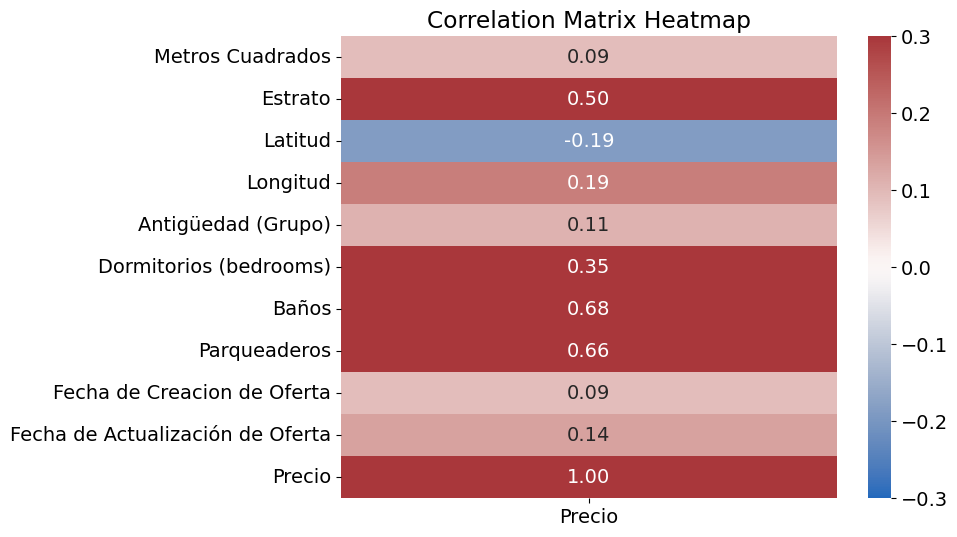

In [94]:
corr_matrix = a.join(b).corr()

single_col_corr = corr_matrix[["Precio"]]

plt.figure(figsize=(8, 6)) # Adjust figure size as needed

sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

plt.title('Correlation Matrix Heatmap')
plt.show()

### Conformidad
#### El análisis de conformidad fue realizado como un breve análisis en la parte introductoria del notebook

### Precisión/Exactitud:

In [95]:
df[df["Precio"] < 100000000][["URL", "Precio"]]

# Algunas casas con un precio inferior a los 100 millones de pesos.

# En la primera, la casa simplemente no tiene un precio especificado pues pide que se consulte, en este caso se eliminará del dataset.

# En el segundo caso, la casa es una VIS (Vivienda de Interés Social), este precio es el precio del derecho de cesión y no corresponde al
# valor de la propiedad. Sumando el precio del derecho de cesión y de lo que faltaría por pagar se obtiene el valor de $199.485.250 COP,
# sin embargo, optamos por eliminarlo pues no conocemos suficiente del tema para saber cuál es el valor real de la casa dadas estas 
# circunstancias.

,URL,Precio
5244,/casa-en-venta-en-la-estrella/192228606,1
5474,/apartamento-en-venta-en-la-estrella/192715365,55000000


In [96]:
df = df[df["Precio"] >= 100000000]

# Eliminamos estos datos

In [97]:
# Veamos esto

df["Precio"].describe()

count    5.757000e+03
mean     7.029771e+08
std      7.215272e+08
min      1.020000e+08
25%      3.500000e+08
50%      4.920000e+08
75%      7.520000e+08
max      1.000000e+10
Name: Precio, dtype: float64

In [98]:
# Como se puede ver, la media es bastante mayor que la mediana. Esto es normal, porque esperamos que hayan casas carísimas. Sin embargo,
# más adelante usaremos un análisis que asume cosas como la log-normalidad de relaciones entre las variables precio y metros cuadrados. 


# Como el modelo no va orientado a propiedades carísimas, en un esfuerzo por mejorar el desempeño del modelo, se eliminarán las 
# propiedades que sean 5 veces más caras que la media.

df[df["Precio"] >= 34.5e8]["ID de la propiedad"].count() / df["ID de la propiedad"].count()

np.float64(0.014069828035435123)

In [99]:
df = df[df["Precio"] < 34.5e8]

In [100]:
df['Baños'].unique()

array([2.        , 1.        , 3.        , 5.        , 4.        ,
       6.        , 7.        , 2.10891694, 4.63492063, 9.        ,
       8.        , 3.77666667])

In [101]:
df['Dormitorios (bedrooms)'].unique()

array([ 3,  0,  1,  2,  4,  6,  5,  7,  8, 10, 12])

Hay casas con muchos dormitorios, contrastemos algunas de ellas, asumiré que cada casa tiene como mucho 4
dormitorios por cada 50 metros cuadrados

In [102]:
df["Baños"].unique()

array([2.        , 1.        , 3.        , 5.        , 4.        ,
       6.        , 7.        , 2.10891694, 4.63492063, 9.        ,
       8.        , 3.77666667])

In [103]:
# Ahora, veamos las propiedades que son muy grandes, para el área metropolitana fijaremos este límite arbitrario en los 1000 metros.
# Es cierto que hay mansiones que superan este límite, pero nuestro modelo no se especializa en este tipo de propiedades. Para cumplir
# con el análisis imprimamos estas propiedades.

df[df["Metros Cuadrados"] > 1000]["Metros Cuadrados"].sort_values(ascending=False)

# Mire, hay una de 133,377 metros cuadrados! Parece mas bien una finca. Voy a borrar todas estas que representan sólo...

510     133377.0
5219     11000.0
5375      7988.0
5165      6225.0
4950      6106.0
4914      6000.0
5214      5600.0
4857      5000.0
5366      3871.0
33        3223.0
2524      3000.0
4150      2932.0
4374      2800.0
5392      2477.0
3235      2100.0
5286      2100.0
331       2060.0
4954      1775.0
4909      1670.0
4650      1631.0
5473      1600.0
1178      1554.0
4342      1410.0
4364      1200.0
4329      1050.0
Name: Metros Cuadrados, dtype: float64

In [104]:
(df[df["Metros Cuadrados"] > 1000]["Metros Cuadrados"].sort_values(ascending=False).count() / df["ID de la propiedad"].count()) * 100

# El 0.44% de los datos.

np.float64(0.4404510218463707)

In [105]:
# Borramos estos...

df = df[df["Metros Cuadrados"] <= 1000]


### Consistencia
#### Verificaremos que las relaciones entre distintas columnas tengan sentido
Empecemos con la relación metros cuadrados y dormitorios

In [106]:
r_cols = ["Metros Cuadrados", "Dormitorios (bedrooms)", "URL", "Precio", "ID de la propiedad"]

df[(df['Dormitorios (bedrooms)'] / df['Metros Cuadrados']) > (4 / 50)][r_cols]

# Vemos de todo un poco, casas con 0 metros cuadrados, con 1 metro cuadrado o hasta 12... 
# Estas casas son las que tienen también valores atípicos como 12 dormitorios, o 15...

# Revisaré cada una de ellas y documentaré qué cambios se hicieron

# Para el caso de las que tienen 0, 1 y 5 metros cuadrados se eliminaron de la muestra, no hay una forma suficientemente fiable para 
# utilizarlas o poder rellenar esto viendo las fotos, al menos para nosotros que no tenemos experiencia vendiendo o comprando casas. 

# Para el caso del apartamento con ID de propiedad "193036264" se nota que fue un error de digitación. Querían colocar 125,3 metros cuadrados.
# Será arreglado.

# La oferta con ID "192428767" es una casa-lote, será eliminada porque no corresponde a la muestra estudiada.

# La oferta con ID "193036957" es un edificio y, como el caso anterior, será eliminada pues no corresponde a la muestra estudiada.

# La oferta con ID "193001953" fue eliminada y no pudo ser verificada, por ello, se asume que está mal inputada y se eliminará.

# La oferta con ID "192888891" es una casa de dos pisos dividida en dos apartamentos, nosotros no estudiamos este tipo de ofertas para
# el modelo que hacemos (No está enfocado en duplex), por tanto se elimina de la muestra.


,Metros Cuadrados,Dormitorios (bedrooms),URL,Precio,ID de la propiedad
210,60.0,5,/casa-en-venta-en-barrio-nuevo-medellin/192888891,360000000,192888891
748,0.0,3,/apartamento-en-venta-en-la-navarra-bello/1927...,410000000,192706179
1439,1.0,2,/apartamento-en-venta-en-loma-de-la-doctora-sa...,350000000,192844667
2506,37.0,3,/apartamento-en-venta-en-loreto-medellin/19300...,180000000,193001953
2625,5.0,2,/apartamento-en-venta-en-san-antonio-de-prado-...,185000000,193037422
2637,0.0,1,/casa-en-venta-en-medellin/193036859,1050000000,193036859
3272,105.0,12,/casa-en-venta-en-itagui/192428767,1300000000,192428767
4801,12.3,3,/apartamento-en-venta-en-zuñiga-envigado/19303...,1362000000,193036264
5153,5.0,2,/apartamento-en-venta-en-la-ferreira-la-estrel...,369000000,191345434
5512,0.0,2,/apartamento-en-venta-en-la-aldea-la-estrella/...,210000000,192650569


In [107]:
# Comuníquese y cúmplase.


delete_cond = ( ( (df['Dormitorios (bedrooms)'] / df['Metros Cuadrados']) > (4 / 50) ) & (df["Metros Cuadrados"] <= 5) )
df = df[~delete_cond]

df.loc[(df["ID de la propiedad"] == 193036264), "Metros Cuadrados"] = 125.30

delete_ids = (192428767, 193001953, 192888891, 193036957)

delete_cond2 = df["ID de la propiedad"].isin(delete_ids)
df = df[~delete_cond2]

In [108]:
### Verificaré que las coordenadas de latitud y longitud correspondan al área metropolitana de Medellín.

lat_min, lat_max = 5.8384, 6.6384
lon_min, lon_max = -75.9271, -75.1271

# Estas cordenaadas las generamos seleccionando un cuadrado en un mapa de google maps.


# Suponiendo que tu DataFrame se llama df
# y las columnas son 'Latitud' y 'Longitudd'

df[
    (df['Latitud'] < lat_min) | (df['Latitud'] > lat_max) |
    (df['Longitud'] < lon_min) | (df['Longitud'] > lon_max)
]

### Encontramos un dato fuera del Área Metropolitana... Antes verificamos que todos tuvieran el departamento Antioquia, claramente es
### un error de la página donde aparece listado. Está significativamente fuera. Lo borraremos.



,ID de la propiedad,Tipo de Inmueble,Ciudad,Metros Cuadrados,Estrato,Latitud,Longitud,Antigüedad (Grupo),Dormitorios (bedrooms),Baños,Parqueaderos,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Dirección,URL,Precio
1226,192701484,Apartamento,Sabaneta,112.0,5.0,7.000606,-75.495972,3.0,4,3.0,1,2025-07-30,2025-09-11,Apartamento en Venta en Sabaneta,/apartamento-en-venta-en-sabaneta/192701484,595000000


In [109]:
df = df.drop(df[df["ID de la propiedad"] == 192701484].index)


### Para un análisis más exhaustivo de consistencia se hará Mahalanobis para detectar outliers.
Antes veamos por qué no usar otro método (como mahalanobis)

🔴 Datos anómalos (distancia de Mahalanobis > 95%):
            Precio  Metros Cuadrados
36    2.200000e+09             477.0
73    2.300000e+08             230.0
183   6.300000e+08             300.0
291   1.250000e+09             280.0
292   2.100000e+09             457.0
...            ...               ...
5741  9.590000e+08             865.0
5743  3.350000e+08             200.0
5784  1.700000e+09             250.0
5803  1.995000e+09             215.0
5805  1.690000e+09             286.0

[438 rows x 2 columns]


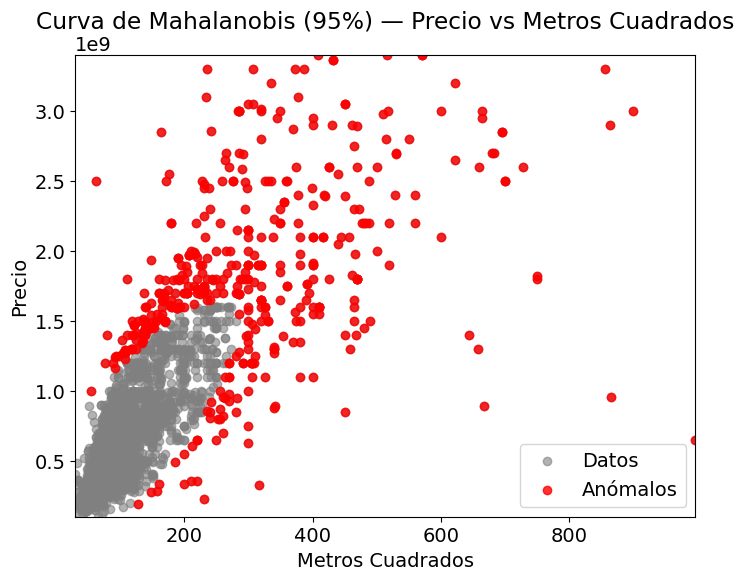

In [110]:
# --- Datos ---
# Asegúrate de tener cargado tu DataFrame con nombre df
# y que contenga las columnas "Precio" y "Metros Cuadrados"
X = df[["Precio", "Metros Cuadrados"]].dropna().astype(float)

# --- Calcular distancia de Mahalanobis ---
X_values = X.values
mu = np.mean(X_values, axis=0)
cov = np.cov(X_values, rowvar=False)
inv_cov = np.linalg.pinv(cov)

# Distancias cuadradas
diff = X_values - mu
md2 = np.sum(diff @ inv_cov * diff, axis=1)
threshold = chi2.ppf(0.90, df=2)  # nivel 99%

# --- Datos anómalos ---
outliers = md2 > threshold
anomalias = X.loc[outliers]
print("🔴 Datos anómalos (distancia de Mahalanobis > 95%):")
print(anomalias)

# --- Curva (contorno) de Mahalanobis ---
x = np.linspace(X["Metros Cuadrados"].min(), X["Metros Cuadrados"].max(), 100)
y = np.linspace(X["Precio"].min(), X["Precio"].max(), 100)
Xgrid, Ygrid = np.meshgrid(x, y)
XY = np.stack([Xgrid.ravel(), Ygrid.ravel()], axis=1)
diff_grid = XY - mu
md2_grid = np.sum(diff_grid @ inv_cov * diff_grid, axis=1).reshape(Xgrid.shape)

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.scatter(X["Metros Cuadrados"], X["Precio"], c="gray", alpha=0.6, label="Datos")
plt.contour(Xgrid, Ygrid, md2_grid, levels=[threshold], colors="red", linewidths=2)
plt.scatter(anomalias["Metros Cuadrados"], anomalias["Precio"], c="red", label="Anómalos", alpha=0.8)
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Curva de Mahalanobis (95%) — Precio vs Metros Cuadrados")
plt.legend()
plt.show()

**Análisis de Mahalanobis**:
Parece que le da prioridad a casas de menor precio frente a las de mayor precio. Esto es porque mahalanobis asume una distribución normal y la distribución real seguramente tiene una cola pesada.

### Hallazgos y posible arreglo
Como se ve, el dato más representativo son los metros cuadrados. Sin embargo hay varias dimensiones que son también son bastante relevantes, en orden de importancia las primeras 5:

In [111]:
corr_matrix[["Precio"]].sort_values(by="Precio", ascending=False)[1:6]

,Precio
Baños,0.678068
Parqueaderos,0.663350
Estrato,0.504122
Dormitorios (bedrooms),0.352441
Longitud,0.191172


eps calculado automáticamente: 0.153
Número de clusters encontrados: 7
Número de outliers detectados: 253


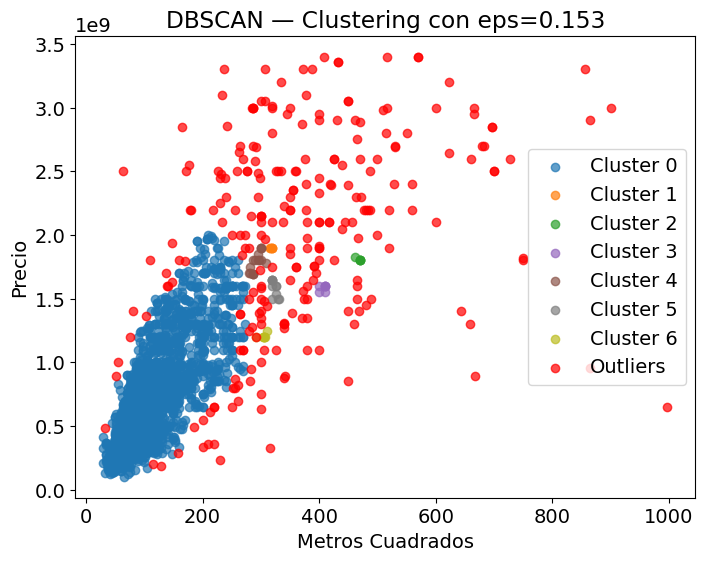

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# --- Datos ---
X = df[["Precio", "Metros Cuadrados"]].dropna().astype(float)

# --- Escalar los datos ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Parámetros ---
min_samples = 5

# --- Calcular distancias al min_samples-ésimo vecino ---
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, -1])

# --- Calcular eps automáticamente (método del codo) ---
# Normalizamos los puntos
x = np.arange(len(k_distances))
y = k_distances
x_norm = (x - x.min()) / (x.max() - x.min())
y_norm = (y - y.min()) / (y.max() - y.min())

# Línea que une el primer y último punto
line_start = np.array([0, 0])
line_end = np.array([1, 1])
line_vec = line_end - line_start

# Calcular distancia perpendicular de cada punto a la línea
distances_to_line = np.abs((y_norm - 0) - ((1-0)/(1-0))*(x_norm - 0)) / np.sqrt(1 + 1)
eps_index = np.argmax(distances_to_line)
eps_auto = y[eps_index]

print(f"eps calculado automáticamente: {eps_auto:.3f}")

# --- Ajustar DBSCAN con eps calculado ---
dbscan = DBSCAN(eps=eps_auto, min_samples=min_samples)
clusters = dbscan.fit_predict(X_scaled)

# --- Agregar resultados al DataFrame ---
X["Cluster"] = clusters
outliers = X[X["Cluster"] == -1]

print("Número de clusters encontrados:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Número de outliers detectados:", len(outliers))

# --- Gráfico de clusters y outliers ---
plt.figure(figsize=(8,6))
unique_clusters = set(clusters)
colors = plt.cm.get_cmap("tab10", len(unique_clusters))

for cluster in unique_clusters:
    mask = X["Cluster"] == cluster
    if cluster == -1:
        plt.scatter(
            X.loc[mask, "Metros Cuadrados"],
            X.loc[mask, "Precio"], 
            c="red", label="Outliers", alpha=0.7
        )
    else:
        plt.scatter(
            X.loc[mask, "Metros Cuadrados"],
            X.loc[mask, "Precio"], 
            c=[colors(cluster)], label=f"Cluster {cluster}", alpha=0.7
        )

plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title(f"DBSCAN — Clustering con eps={eps_auto:.3f}")
plt.legend()
plt.show()


In [113]:
# Enfoque con DBscan:

# Anomalías:
(X["Cluster"] == -1).sum()

# Eliminar anomalías del DF



np.int64(253)

### Resultado


In [114]:
outliers.sum()

Precio              5.077937e+11
Metros Cuadrados    9.316870e+04
Cluster            -2.530000e+02
dtype: float64

In [115]:
# Eliminamos las que quedaron fuera.

#df = df[~outliers] #Mahalanobis
df = df[X["Cluster"] != -1] # DBscan


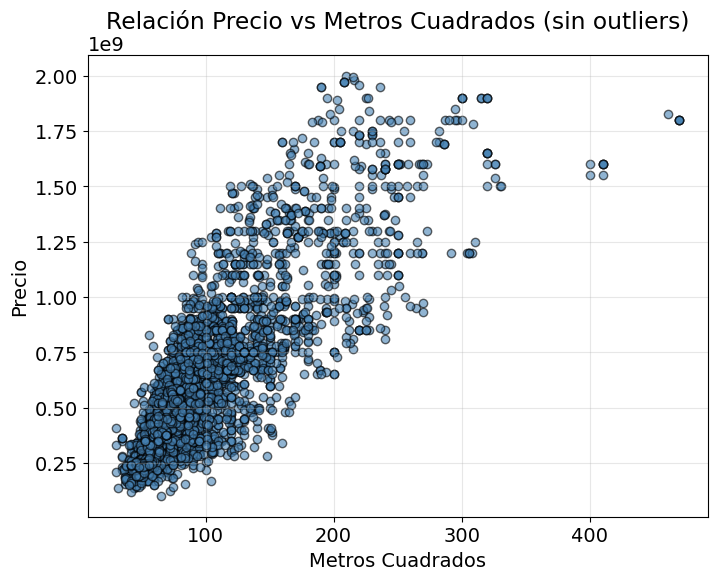

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(df["Metros Cuadrados"], df["Precio"], 
            color="steelblue", alpha=0.6, edgecolor="k")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Precio")
plt.title("Relación Precio vs Metros Cuadrados (sin outliers)")
plt.grid(alpha=0.3)
plt.show()


### Duplicados 

In [117]:
df.duplicated().sum()

np.int64(164)

Estos son los registros duplicados, sin embargo quiero ver ademas segun el ID cuantos registros hay duplicados, y con el url

In [118]:
df['URL'].duplicated().sum()

np.int64(164)

In [119]:
df['ID de la propiedad'].duplicated().sum()

np.int64(164)

In [120]:
df[df[['Latitud', 'Longitud']].duplicated()][['ID de la propiedad','Latitud', 'Longitud', 'URL']].count()

ID de la propiedad    2054
Latitud               2054
Longitud              2054
URL                   2054
dtype: int64

Hay casas con latitud y longitud repetida, pero son registros distintos (esto se puede ver ya que el ID es distinto, y al ingresar a la URL, la casa es distinta). Por ende, la latitud y longitud expresan unicamente el sector especifico donde esta la casa, mas no exactamente la ubicacion. De hecho al ver Localidad Principal de repetidos, se puede ver que estan en la misma zona. 

Gracias a lo anterior podemos rellenar los nulos del estrato que descubrimos anteriormente

In [121]:
df["Estrato"].unique()

array([ 3.,  4., nan,  2.,  5.,  1.,  6.])

In [122]:
# Al haber latitud y longitud repetidos me interesa ver cómo se comportan sus estratos.


analisis_estrato = (df[['Latitud', 'Longitud']].duplicated()) & (~df["Estrato"].isna())

estrato_y_ubicacion = df[analisis_estrato][['Latitud', 'Longitud', "Estrato"]].groupby(["Latitud", "Longitud"]).apply(lambda x: x.mode().iloc[0])

estrato_y_ubicacion.drop(columns=["Latitud", "Longitud"], inplace=True)

# Para estos datos, asignaré el promedio asociado a cada par de longitud y latitud para los datos a los que no se especificó,
# esto porque creemos que, de las variables disponibles, la ubicación es la mejor predictora del estrato.

In [123]:
estrato_y_ubicacion

,,Estrato
Latitud,Longitud,
6.057275,-75.502611,3.0
6.115978,-75.636511,3.0
6.116640,-75.649970,3.0
6.116801,-75.634702,3.0
6.118603,-75.634626,3.0
...,...,...
6.350780,-75.570345,3.0
6.351129,-75.569467,3.0
6.351217,-75.556850,3.0


In [124]:
df_merged = df.merge(estrato_y_ubicacion, on=['Latitud', 'Longitud'], how='left', suffixes=('', '_ref'))

df_merged['Estrato'] = df_merged['Estrato'].fillna(df_merged['Estrato_ref'])

In [125]:
# ANTES:
df["Estrato"].isna().sum()

np.int64(215)

In [126]:
df = df_merged.drop(columns=['Estrato_ref'])

In [127]:
# DESPUES:
df["Estrato"].isna().sum()

# Logramos arreglar bastantes registros.

np.int64(134)

In [128]:
# El resto serán eliminados, si se deseara hacer algo más se podría asignar a cada registro un barrio usando su
# longitud y latitud y una api de reverse geo lookup. Sin embargo esta opción es costosa o lenta, y no tenemos tiempo
# ni mucho menos dinero 😅

df = df[~df["Estrato"].isna()]

In [129]:
# Veamos qué otra cosa podemos intentar arreglar

df.isna().sum()

# Parece que lo que más nos afecta ahora mismo es que no sabemos la antigüedad de las casas...
# Esto es algo más difícil de solucionar porque no es fácil pensar un predictor directo de esta
# así que hagamos una correlación y ya se nos ocurrirá algo...

ID de la propiedad                    0
Tipo de Inmueble                      0
Ciudad                                0
Metros Cuadrados                      0
Estrato                               0
Latitud                               0
Longitud                              0
Antigüedad (Grupo)                  804
Dormitorios (bedrooms)                0
Baños                                 0
Parqueaderos                          0
Fecha de Creacion de Oferta           0
Fecha de Actualización de Oferta      0
Dirección                             0
URL                                   0
Precio                                0
dtype: int64

In [130]:
test = df[(df["Precio"] > 80000000) & (df["Precio"] < 1200000000)]

a = test.iloc[:, 3:13]
b = test.iloc[:, 15]

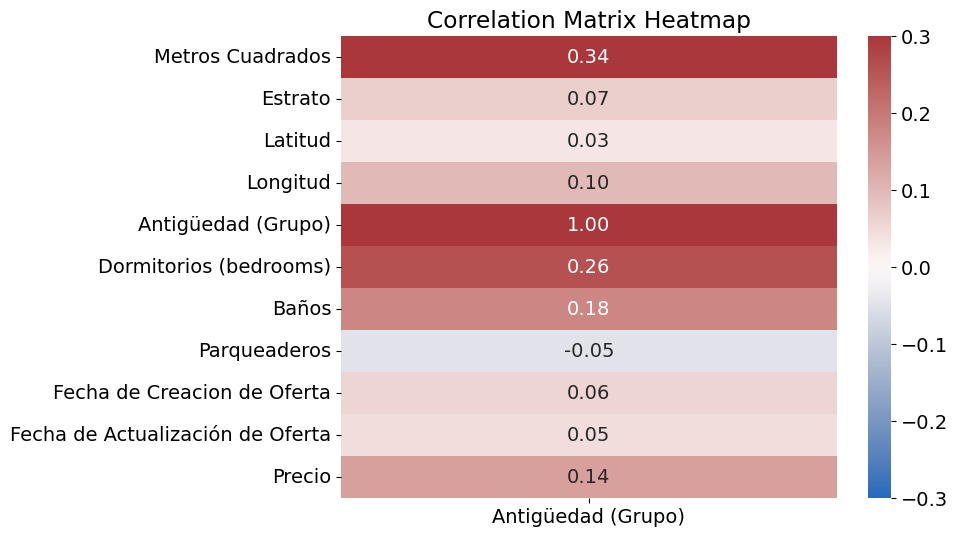

In [131]:
corr_matrix = a.join(b).corr()

single_col_corr = corr_matrix[["Antigüedad (Grupo)"]]

plt.figure(figsize=(8, 6)) # Adjust figure size as needed

sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

plt.title('Correlation Matrix Heatmap')
plt.show()

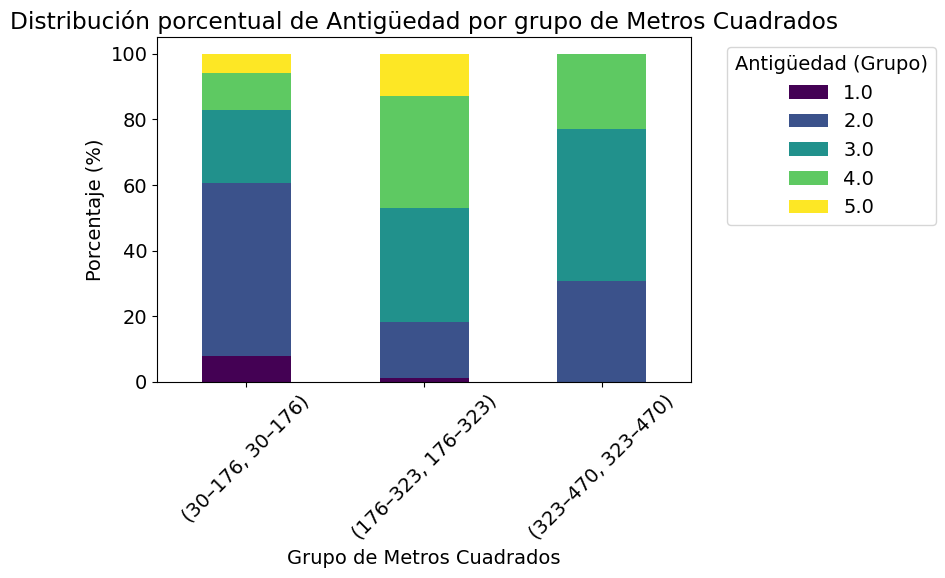

In [132]:
# Crear una copia temporal de la columna para no modificar df
met_cuad = df['Metros Cuadrados']

# Calcular min y max de metros cuadrados
min_m2 = met_cuad.min()
max_m2 = met_cuad.max()

# Definir número de grupos
n_grupos = 3

# Crear bins (intervalos)
bins = np.linspace(min_m2, max_m2, n_grupos + 1)

# Crear etiquetas con formato limpio "a–b"
labels = [f"{int(bins[i])}–{int(bins[i+1])}" for i in range(len(bins)-1)]

# Crear serie de grupo sin modificar df
grupo_m2 = pd.cut(
    met_cuad,
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Calcular distribución porcentual por grupo de metros cuadrados
dist_porcentual = (
    df.assign(**{'Grupo Metros Cuadrados': grupo_m2})  # se crea temporalmente
    .groupby(['Grupo Metros Cuadrados', 'Antigüedad (Grupo)'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)

# Gráfico apilado porcentual
ax = dist_porcentual.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    colormap='viridis'
)

plt.title('Distribución porcentual de Antigüedad por grupo de Metros Cuadrados')
plt.xlabel('Grupo de Metros Cuadrados')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.legend(title='Antigüedad (Grupo)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [133]:
# Note que los aptos de menos de 150 metros cuadrados suelen pertenecer al grupo 2 de Antigüedad (1 a 8 años)

# Este valor se usará para rellenar estos grupos.

(df[df["Antigüedad (Grupo)"].isna() & (df["Metros Cuadrados"] < 150)].count()["ID de la propiedad"] / (df[df["Metros Cuadrados"] < 150].count())["ID de la propiedad"]) * 100

# Antes, el 15.38% de los datos de este grupo son NA. Por tanto, no afectaremos demasiado la moda.

np.float64(15.591977571705845)

In [134]:
df.loc[df["Antigüedad (Grupo)"].isna() & (df["Metros Cuadrados"] < 150), "Antigüedad (Grupo)"] = 2

In [135]:
df.isna().sum()

# Excelente, rescatamos algunos datos

ID de la propiedad                   0
Tipo de Inmueble                     0
Ciudad                               0
Metros Cuadrados                     0
Estrato                              0
Latitud                              0
Longitud                             0
Antigüedad (Grupo)                  81
Dormitorios (bedrooms)               0
Baños                                0
Parqueaderos                         0
Fecha de Creacion de Oferta          0
Fecha de Actualización de Oferta     0
Dirección                            0
URL                                  0
Precio                               0
dtype: int64

In [136]:
# El resto serán borrados porque no es claro a qué antigüedad pertenece, si se observa el gráfico se pierde esa tendencia...

df = df[~df["Antigüedad (Grupo)"].isna()]

### Integridad

Debido a que los datos provienen de una fuente única, no es necesario hacer un análisis de integridad

### Volvamos a ver las correlaciones!


In [137]:
test = df.copy()

a = test.iloc[:, 3:13]
b = test.iloc[:, 15]

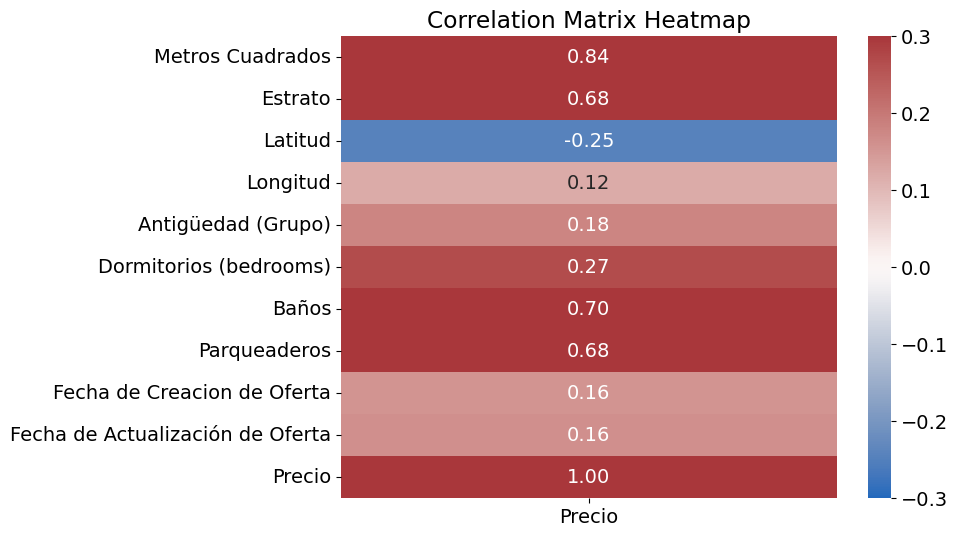

In [138]:
corr_matrix = a.join(b).corr()

single_col_corr = corr_matrix[["Precio"]]

plt.figure(figsize=(8, 6)) # Adjust figure size as needed

sns.heatmap(single_col_corr, annot=True, cmap='vlag', fmt=".2f", vmin=-0.3, vmax=0.3)

plt.title('Correlation Matrix Heatmap')
plt.show()

Wow! Qué orgullo! Quiero agradecer a todas las personas que han confiado en mí: mi familia, mis padres, mis hermanos, mi pareja, mis amigos, mis mentores personales, mi comunidad, mis vecinos, mi círculo más cercano, mis profesores, mis compañeros de clase, mis tutores o asesores, mi universidad, mi equipo de investigación, mis antiguos maestros, mis orientadores académicos, quienes me inspiraron a seguir estudiando, el personal administrativo de la institución, mis compañeros de proyectos, mi equipo de trabajo, mis jefes, mis colegas, mis clientes, mis socios, mi empresa, los colaboradores del proyecto, mi equipo de liderazgo, mi red profesional, mis seguidores, los patrocinadores, los voluntarios, las organizaciones que me respaldaron, los medios de comunicación, las instituciones aliadas, los que creyeron en mi idea desde el principio, los que me brindaron consejos, mis críticos constructivos, los que me impulsaron a mejorar, mis referentes, mis entrenadores o coaches, mis compañeros de camino, las personas que me animaron en los momentos difíciles, quienes me enseñaron con el ejemplo, los que me dieron su confianza sin conocerme, quienes me apoyaron en silencio, las nuevas generaciones que me motivan a seguir, y todos los que alguna vez apostaron por mí.

# Preparación específica para el modelado

In [139]:
from sklearn.preprocessing import OrdinalEncoder


dm = df.copy()

# Se eliminan las columnas que no aportan nada al modelado.
dm = dm.drop(['ID de la propiedad', 'URL', 'Dirección'], axis = 1)

dm = dm.dropna(subset=['Antigüedad (Grupo)']) # Linea Provisional (Problema: Se eliminan 884 datos, es posible que haya manera de llenarlos)
dm = dm.dropna(subset = ['Metros Cuadrados']) 
dm = dm[(dm['Estrato'] < 7) & (dm['Estrato'] > 0)]
dm = dm[dm['Parqueaderos'] >=0]
dummies = pd.get_dummies(
    dm[["Tipo de Inmueble", "Ciudad"]],
    prefix=["tipo", "ciudad"],
    
)

# --- Añadirlas al DataFrame original ---
dm = pd.concat([dm, dummies], axis=1)

# 🧹 --- Eliminar las columnas originales ---
dm = dm.drop(columns=["Tipo de Inmueble", "Ciudad"])

In [140]:
dm['Estrato'] = dm['Estrato'].round()
dm['Antigüedad (Grupo)'] = dm['Antigüedad (Grupo)'].round()

In [141]:
# Se guarda el dataframe en un JSON listo para modelado
dm.to_json("modellingData.json")

In [142]:
dm

,Metros Cuadrados,Estrato,Latitud,Longitud,Antigüedad (Grupo),Dormitorios (bedrooms),Baños,Parqueaderos,Fecha de Creacion de Oferta,Fecha de Actualización de Oferta,Precio,tipo_Apartamento,tipo_Casa,ciudad_Bello,ciudad_Envigado,ciudad_Itaguí,ciudad_La estrella,ciudad_Medellín,ciudad_Sabaneta
0,59.0,3.0,6.343308,-75.542227,2.0,3,2.0,0,2025-08-25,2025-09-16,275000000,True,False,True,False,False,False,False,False
1,64.9,3.0,6.340643,-75.560242,2.0,0,2.0,0,2025-08-29,2025-08-29,280000000,True,False,True,False,False,False,False,False
2,67.0,3.0,6.341758,-75.578913,3.0,3,2.0,1,2025-09-04,2025-10-30,260000000,True,False,True,False,False,False,False,False
3,72.0,3.0,6.340513,-75.539474,2.0,3,2.0,1,2025-09-05,2025-09-20,433000000,True,False,True,False,False,False,False,False
4,91.0,3.0,6.335474,-75.555586,4.0,3,2.0,0,2025-09-09,2025-09-29,295000000,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,53.0,4.0,6.164476,-75.647278,2.0,2,2.0,1,2025-10-22,2025-10-22,350000000,True,False,False,False,False,True,False,False
5343,147.0,4.0,6.164737,-75.643079,3.0,3,3.0,2,2025-10-22,2025-10-22,890000000,False,True,False,False,False,True,False,False
5344,48.0,3.0,6.126384,-75.635566,2.0,2,1.0,0,2025-10-23,2025-10-23,230000000,True,False,False,False,False,True,False,False
5345,78.0,4.0,6.163692,-75.647383,1.0,3,2.0,1,2025-10-24,2025-10-24,528000000,True,False,False,False,False,True,False,False


# Modelo con datos

La siguiente sección se hará en el siguiente archivo: ModellingPhase.ipynb